In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import random as rand


size_of_each_class = 100
distributions = [[0,5],
                [30, 15],
                [90, 3], [150, 50]]
distribution_variance = [[2, 15], [2, 1], [32, 42]]
num_classes = len(distributions)
print(num_classes, "classes")
data = []
targets = []
dimensions = 5
i = 0
#For each distribution, generate guassian data and add to our data
for mu, sigma in distributions:
    
    #Generate size_of_each_class number of normal distibution datapoints
    full_dimension = []
    for j in range(dimensions):
        rand_variance =  distribution_variance[rand.randint(0,2)] #this makes each distrubiton a little varied
        mu2 = mu +rand_variance[0]
        sigma2 = sigma + rand_variance[1]
        gaussian_data = np.random.normal(mu2, sigma2, size_of_each_class)
        full_dimension.append(gaussian_data)
    full_dimension = np.asarray(full_dimension)
    if(len(data) != 0) :
        data = np.append(data, np.transpose(full_dimension), axis = 0)
    else :
        data = np.transpose(full_dimension)
    
    #Generate a target same size as each class size        
    gen_targets = i * np.ones((1,size_of_each_class))        
    targets.append(gen_targets)
    i += 1

targets = np.asarray(targets).flatten()

print('Shape of data is : ', data.shape)
print('Shape of targets : ', targets.shape)

4 classes
Shape of data is :  (400, 5)
Shape of targets :  (400,)


## Visualize the data

Text(0.5, 0, 'Z')

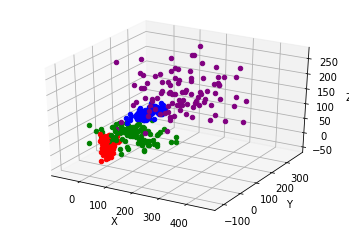

In [42]:
graph_data = data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'purple']
for i in range(len(graph_data)):
    ax.scatter(graph_data[i][0], graph_data[i][1], graph_data[i][2], c = colors[int(targets[i])])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

## Perform PCA

Text(0, 0.5, 'Singular Values (log scale)')

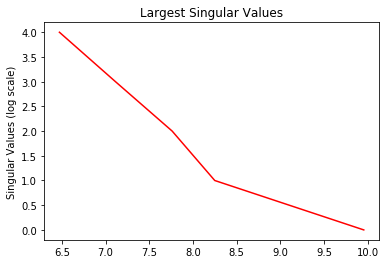

In [46]:
sub = data - np.mean(data, axis=0)
cov = sub.T @ sub / len(sub)
w, v = np.linalg.eig(cov)
plt.plot(np.log(w), np.arange(0, len(w), 1), color='red')
plt.title("Largest Singular Values")
plt.ylabel("Singular Values (log scale)")

### Get top 2 Eigenvectors and project data onto this new axis

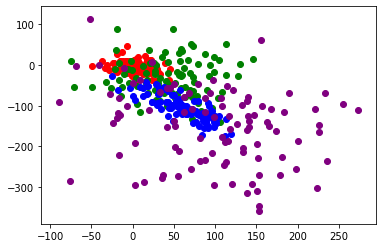

In [53]:
top = v[:2]
proj = data @ top.T 
for i in range(len(proj)):
    plt.scatter(proj[i][0], proj[i][1], color = colors[int(targets[i])])